# Ch/ChE 164 Project
## Marta Gonzalvo
## March 18$^{\mathrm{th}}$, 2020

In this python notebook I have included both the required analysis and results, as well as the necessary code. The whole notebook takes less than 10 mins to run.

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize
import matplotlib.pyplot as plt
import ast

## Part 0: Energy

#### a) Occupation of cells contribution:
\begin{align}
    4\,\epsilon \sum_{i=1}^{L}s_i
\end{align}
Each water cell is surrounded by 4 nanotube cells.  If $s_i = 1$, the contribution per nanotube cell will be $\epsilon$, and if $s_i = -1$, the contribution per nanotube cell will be $-\epsilon$. So the penalty per cell of water occupation is of $2\,\epsilon$ per nanotube cell.
#### b) Pairing of spins contribution:
\begin{align}
    - J \sum_{j=0}^{L}s_j s_{j+1}
\end{align} 
So for $L$ cells there are $L+1$ interactions, and we use the same method as above to penalyze different adjacent occupations by $2J$. And taking into account the boundary conditions, where the adjacent cells to the $s_1$ and $s_L$ cells will always be filled with water: $s_0 = s_{i+1} = 1$, we can rewrite that as 
\begin{align}
    - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L
\end{align}
So the Hamiltonian has the form of 
\begin{align}
   H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L \\
   \beta \, H\,\{s\} = 4\,\beta \, \epsilon \sum_{i=1}^{L}s_i - \beta \, J \left( \sum_{j=1}^{L-1}s_j s_{j+1} - s_1 - s_L \right )
\end{align}

Code to calculate the hamiltonian energy:

In [2]:
def energy(eps, J, microstates):
    '''Computes the Energy for all microstates (np.array) unitless (E/(kB*T).
    eps, J are unitless constants (divided by kB*T).'''

    coup_wat_nanot = 4*eps*np.sum(microstates, axis=1)

    coup_spins = np.sum(microstates[:,:-1]*microstates[:,1:], axis=1)
    coup_wat = - J*(coup_spins + microstates[:,0] + microstates[:,-1])
    
    return coup_wat_nanot + coup_wat

Function to generate all possible microstates and list of all microstates:

In [3]:
def microstates(L=5, s_vals=[-1,1]):
    '''Generates all possible microstates, 
    given length of system and possible values of s_i'''
    
    return np.unique(np.random.choice(s_vals, size=(L*200,L)), axis=0)

In [4]:
print('There are in total',len(microstates()), 'microstates. The possible microstates are:')
microstates()

There are in total 32 microstates. The possible microstates are:


array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1],
       [-1, -1, -1,  1, -1],
       [-1, -1, -1,  1,  1],
       [-1, -1,  1, -1, -1],
       [-1, -1,  1, -1,  1],
       [-1, -1,  1,  1, -1],
       [-1, -1,  1,  1,  1],
       [-1,  1, -1, -1, -1],
       [-1,  1, -1, -1,  1],
       [-1,  1, -1,  1, -1],
       [-1,  1, -1,  1,  1],
       [-1,  1,  1, -1, -1],
       [-1,  1,  1, -1,  1],
       [-1,  1,  1,  1, -1],
       [-1,  1,  1,  1,  1],
       [ 1, -1, -1, -1, -1],
       [ 1, -1, -1, -1,  1],
       [ 1, -1, -1,  1, -1],
       [ 1, -1, -1,  1,  1],
       [ 1, -1,  1, -1, -1],
       [ 1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1],
       [ 1, -1,  1,  1,  1],
       [ 1,  1, -1, -1, -1],
       [ 1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1],
       [ 1,  1,  1, -1, -1],
       [ 1,  1,  1, -1,  1],
       [ 1,  1,  1,  1, -1],
       [ 1,  1,  1,  1,  1]])

# Part 1

For the case where the totally filled ($N=L$) and totally empty ($N=0$) microstates are degenerate, $H\,\{1,1,1,1,1\} = H\,\{-1,-1,-1,-1,-1\}$.
\begin{align}
\beta \, H\,\{s\} &= 4\,\beta \, \epsilon \sum_{i=1}^{L}s_i - \beta \, J \left( \sum_{j=1}^{L-1}s_j s_{j+1} - s_1 - s_L \right ) \\  \\
H\,\{1,1,1,1,1\} &= 4\,\epsilon \, 5 - 4 J  - J - J  = 20 \, \epsilon - 6 J \\ \\
H\,\{-1,-1,-1,-1,-1\} &= - 4\,\epsilon \, 5 - 4 J  + J + J = - 20 \, \epsilon - 2 J \\ \\
H\,\{1,1,1,1,1\} &= H\,\{-1,-1,-1,-1,-1\} \\ \\
20 \, \epsilon - 6 J &= - 20 \, \epsilon - 2 J \\
40 \, \epsilon &=  4 J \\
\epsilon &= 0.1 J = \frac{J}{10}
\end{align}
Also, 
\begin{align}
\beta \, \epsilon = \frac{\beta \, J}{10}
\end{align}

<br> <br>


To calculate $P(N)$ and $F(N)$, we need he partition function for the system:

\begin{align}
 Z = \sum_{\{s\}} e^{-\beta H(\{s\})}.
\end{align}
So the probability for  a macrostate is 
\begin{align}
P(N)= \frac{\sum_{\{s\}} e^{-\beta H(\{s\})} \, \, \delta \left( N-\sum^L_{i=1}m_i(s_i) \right) }{\sum_{\{s\}} e^{-\beta H(\{s\})}}, 
\end{align}
where $m_i(s_i) = \frac{1+s_i}{2} = \{0,1\}$, and $\sum_i m_i = N$.

<br>

In this case, the free energy $F(N)$ will be:
\begin{align}
F(N) &= - k_B T\,  ln \, P(N) \\ 
\beta F(N) &= - ln \, P(N)
\end{align}

<br> <br> 
Definitions of the partiton function, $m_i$ function and the probability of all macrostates $\{N\}=\{0, 1, 2, 3, 4, 5\}$:

In [5]:
def partition_fn(eps, J, microstates=microstates()):
    '''Returns partition function for all microstates.'''
    
    x = energy(eps, J, microstates)
    
    return np.sum(np.exp(-x))

###########################################################

def m_i(microstates):
    '''Computes list of m_i, given list of spins.
    s_i=1, m_i=1. s_i=-1, m_i=0'''
    
    m_i = np.array(microstates) == 1

    return m_i.astype(float)

###########################################################

def all_probs(eps, J, L=5, microstates=microstates()):
    '''Calculates all probabilities for all macrostates.
    Returns a list of probabilities for each macrostate.'''
    all_probs = []
    
    exp_energies = np.exp(-energy(eps,J,microstates))
    partition = partition_fn(eps, J, microstates)
    
    div = exp_energies/partition
    m = m_i(microstates)
    
    for N in range(L+1):
        delta = np.sum(m, axis=1) == N 
        
        prob_N = np.sum(div*delta)      
        
        all_probs.append(prob_N)
        
    return all_probs

###########################################################

def free_energy(eps, J, L=5, microstates=microstates()):
    '''Calculates free energy given the probability for a macrostate.'''

    return -np.log(all_probs(eps, J, L, microstates))

Plot of $P(N)$ and $\beta F(N)$.

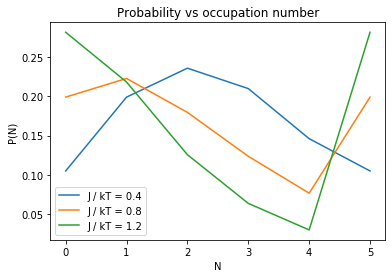

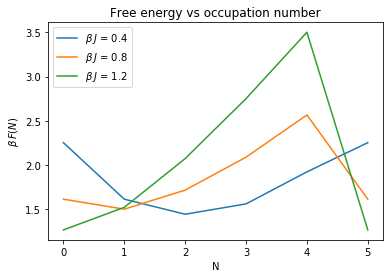

In [6]:
macrostates = [0,1,2,3,4,5]
J_part1 = [0.4, 0.8, 1.2]

#Probability P(N)
for J in J_part1:
    plt.plot(macrostates, all_probs(J/10, J), label='J / kT = {}'.format(J)); 
plt.legend();
plt.xlabel('N');
plt.ylabel('P(N)');
plt.title('Probability vs occupation number')
plt.show()

# Free Energy F(N)
for J in J_part1:
    plt.plot(macrostates, free_energy(J/10, J), label=r'$\beta \, J$ = {}'.format(J));
plt.title('Free energy vs occupation number')
plt.legend();
plt.xlabel('N');
plt.ylabel(r'$\beta \, F(N)$');

In these two plots we can see that for increasing value of $\beta \,J$, there is a shift of most probable states. At low values of $\beta \,J$ like at $\beta \,J=0.4$, there is a moderate free energy well at around $N=2$, favoring the population of intermediatelly filled states. 

However, for increasing values of $\beta \,J$, the trend inverts, where the completely filled and completely empty states are most favorable and most probable. The coupling between water cells gains importance, so that at lower values of $\beta \,J$ we can have mixed regimes with both empty and filled cells. But when $\beta \, J$ increases, the penalty of having an interface, or a filled water cell next to an empty (gas) water cell, is large, and so the system only allows for fully full or empty states, with no interfaces inside of the tube. 

We can relate this to a high surface tension being directly proportional to a high $\beta \,J$. If there is a high surface tension, interfaces will not be favorable and a uniform system will be preferred. However, at low surface tension, there is no penalty to create additional interfaces. In this case, the fluctuations become relevant and by an argument of entropy and degeneracy, the system will be able to explore and prefer an intermediately filled state, as there are more microstates that correspond to intemediately filled macrostates. We can check that this matches the amout of microstates for each macrostate (numbers in the table and in the plot below):

| N | # microstates |
|---|----|
| 0 | 1 |
| 1 | 5 |
| 2 | 10 |
| 3 | 5 |
| 4 | 10 |
| 5 | 1 |

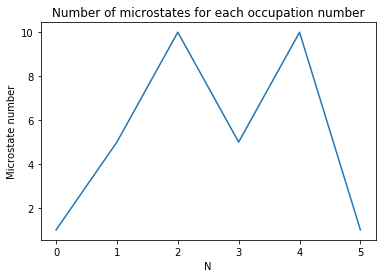

In [7]:
mic_numb = [1,5,10,5,10,1]
plt.plot(macrostates, mic_numb);
plt.xlabel('N');
plt.ylabel('Microstate number');
plt.title('Number of microstates for each occupation number');

## Surface tension

For each interface of area $d^2 = 3.7^2 \, \unicode[serif]{xC5} ^2 $, there is a $2J$ penalty, so the expression relating the two using the surface tension is 
\begin{align}
2 J = \gamma d^2.
\end{align}
Using the value of $\gamma = 72$ mN/m $= 72$ mJ/$\mathrm{m}^2 =$ 0.072 J/$\mathrm{m}^2$, we can get $J$, or $J/k_B T$:
\begin{align}
2 J & = \gamma d^2 \\
2 J & = 0.072 \, \mathrm{J/m}^2 \, (3.7·10^{-10})^2 \, \mathrm{m}^2 \\
J & = 4.928·10^{-21} \, \mathrm{J}\\
\beta  \,J & = 1.198
\end{align}

The value that corresponds to $\beta \, J$ at room temperature is $\beta \, J = 1.2$.

As seen before, this is the value where $\beta \, J$ gains importance with respect to the entropy, and states with no interfaces, completely filled or empty, will be preferred when satisfying the degeneracy condition.

In [8]:
# Calculation
J = ((3.7*(10**(-10)))**2 * 0.072/2)
print('J = ',J, 'J')
print('J\k_BT = ', J/(298*1.380649*(10**(-23))))

J =  4.9284000000000005e-21 J
J\k_BT =  1.197860935948025


# Part 2

In the plots below I show filled, empty and bistable occupancy. The constant values have been found by trial and error, and five values for the empty and filled occupancy are analyzed to show how robust the states are:
- $\beta \, \epsilon < 0.1\, \beta \,J$,  mostly filled
- when $\beta \,\epsilon = 0.1\, \beta \,J = 0.1198$, bistable
- $\beta  \,\epsilon > 0.1\, \beta \,J$, mostly empty

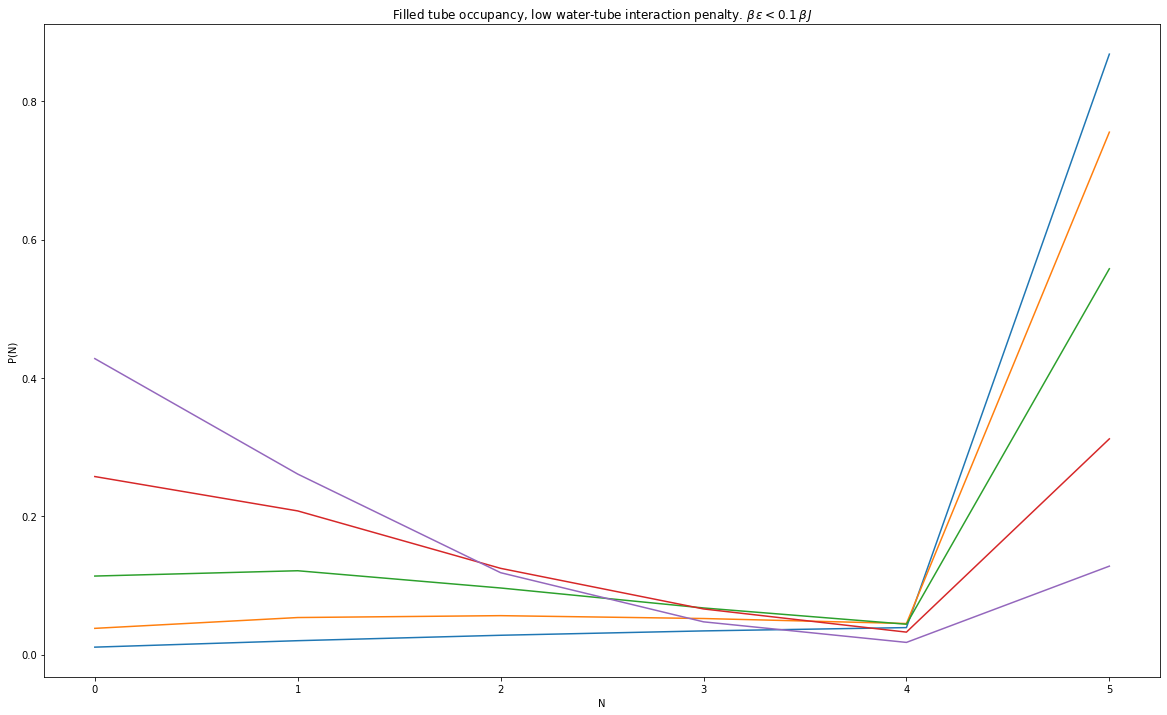

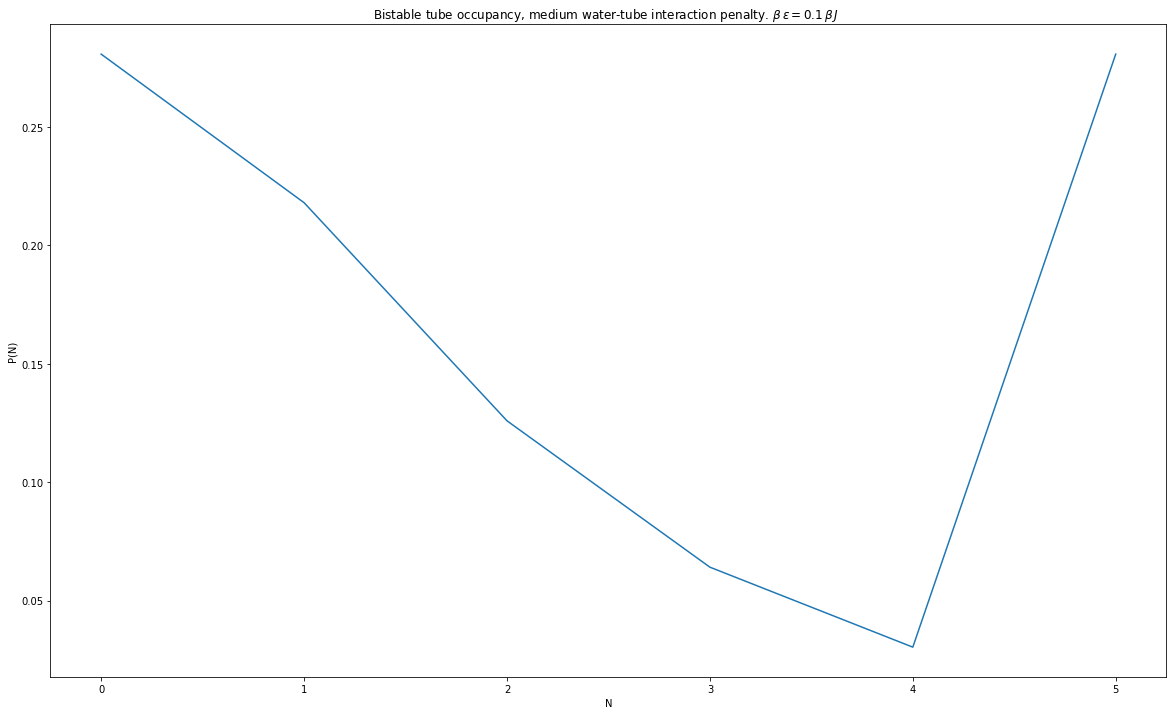

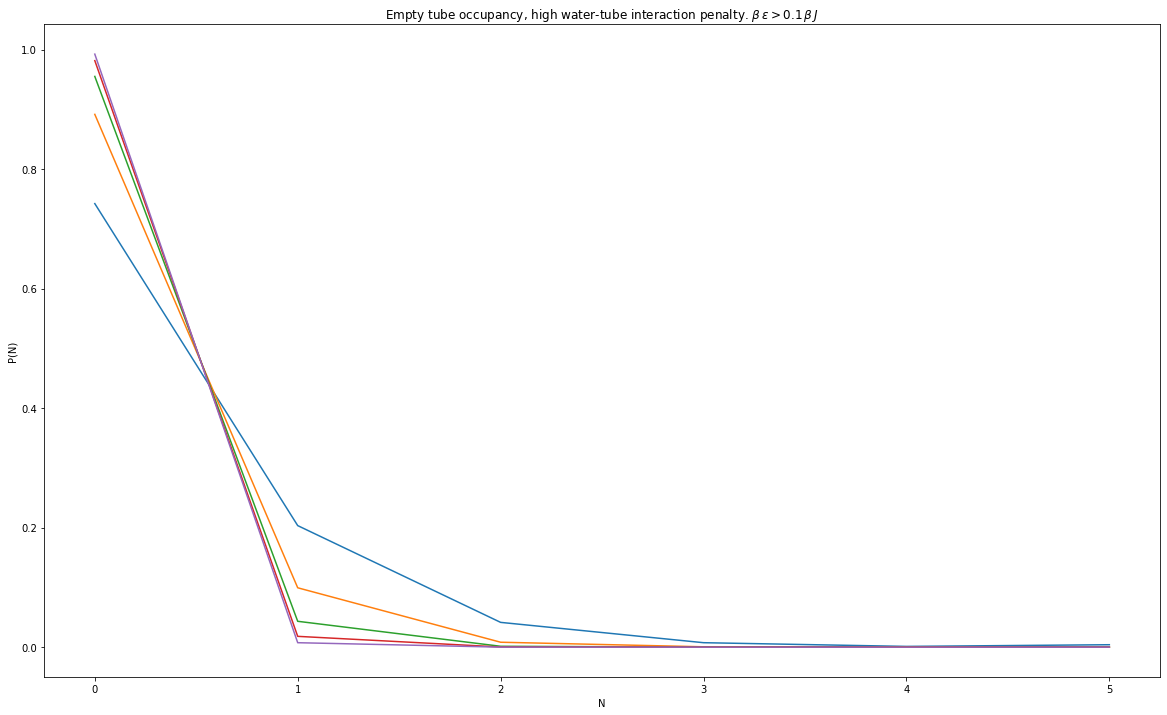

In [30]:
#Defining constant values
J_rt = 1.198
eps_filled = np.linspace(0.01,0.15, 5)
eps_empty = np.linspace(0.25,0.7, 5)

#Filled
for eps in eps_filled:
    plt.plot(macrostates, all_probs(eps, J_rt));
plt.title(r'Filled tube occupancy, low water-tube interaction penalty. $\beta \, \epsilon < 0.1\, \beta \,J$')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()

#Bistable
plt.plot(macrostates, all_probs(J_rt/10, J_rt))
plt.title(r'Bistable tube occupancy, medium water-tube interaction penalty. $\beta \, \epsilon = 0.1 \, \beta \, J $  ')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()

#Empty
for eps in eps_empty:
    plt.plot(macrostates, all_probs(eps, J_rt));
plt.title(r'Empty tube occupancy, high water-tube interaction penalty. $\beta \, \epsilon > 0.1\, \beta \,J$')
plt.xlabel('N');
plt.ylabel('P(N)');

In these plots above we can see the relationship between the coupling of  water cells and the coupling of water cells with nanotube cells at room temperature. For large values of $\beta \, \epsilon$, the hydrophobicity of the nanotube is the most important effect, and so the most favorable states are the empty ones. When $\beta \, \epsilon = 0.1\, \beta \, J$, the empty and filled states are degenerate, due to a balance of $\beta \, \epsilon$ and $\beta \, J$. And for low values of $\beta \, \epsilon$, the trend inverts as the hydrophobicity of the nanotube is negligible, and so the dominance of $\beta \, J$ leads to a completely filled tube, with no interfaces even with the bulk outside of the tube.  

# Part 3

First, trying to analyze the values of $\beta \, J$ vs $\beta \, \epsilon$ for the different P(N), including peaks and non-peaks:

In [10]:
def Energy(eps, J, spins):
        '''Computes the Energy for a given microstate, unitless (E/(kB*T).
        eps, J are unitless constants (divided by kB*T), spins is a list.'''
        
        coup_wat_nanot = 4*eps*np.sum(spins)
        
        coup_spins = [spins[i]*spins[i+1] for i,_ in enumerate(spins[:-1])]
        coup_wat = - J*(np.sum(coup_spins) + spins[0] + spins[-1])
        
        return coup_wat_nanot + coup_wat
    
def probability_microstate(eps, J, spins, N, L=5, microstates=microstates()):    
    '''Computes probability of given microstate, given a macrostate. 
    Microstates is list of lists of spins. 
    Returns a single value'''
    
    partit_fn =  np.sum(np.exp(-Energy(eps, J, spins)) for spins in microstates)
    
    if np.sum(m_i(spins)) == N:
        
        
        return np.exp(-Energy(eps, J, spins))/partit_fn
    else:
        
        return 0


def probability_macrostate(eps, J, N, L=5, microstates=microstates()):    
    '''Computes probability of given macrostate. 
    Microstates is list of lists of spins.
    Returns a single value.'''
        
    return np.sum([probability_microstate(eps, J, spins, N, L, microstates) 
                   for spins in microstates])

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


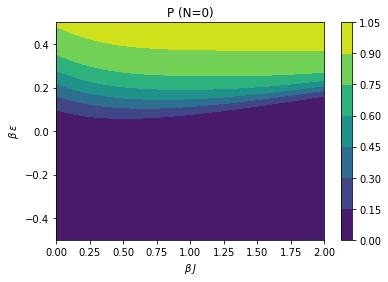

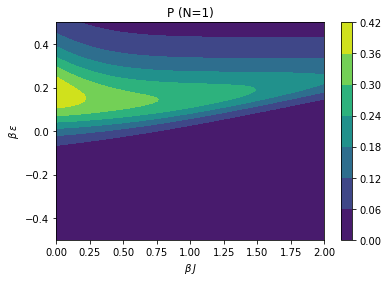

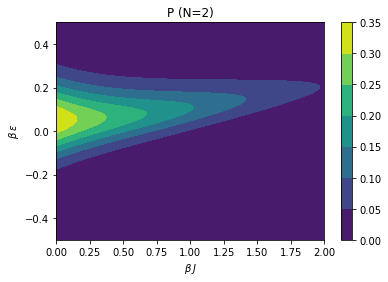

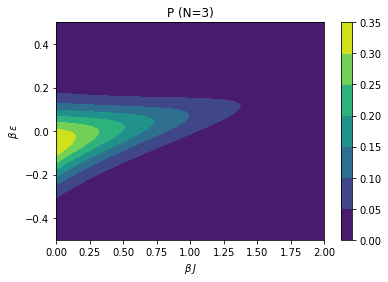

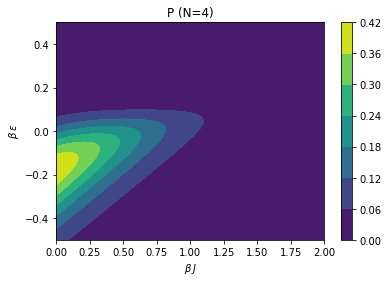

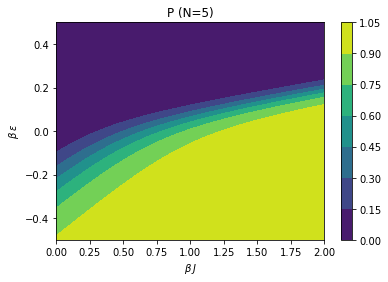

In [11]:
J_part3 = np.linspace(0, 2, 100) # my previous limits: (-1, 2)
eps_part3 = np.linspace(-0.5, 0.5, 100) # my previous limits: (-1, 5)

J_mesh, ep_mesh = np.meshgrid(J_part3, eps_part3)


for N in macrostates:
    
    P = probability_macrostate(ep_mesh, J_mesh, N)
    plt.figure()
    plt.contourf(J_mesh, ep_mesh, P)
    plt.title('P (N={})'.format(N))
    plt.xlabel(r'$\beta \, J$')
    plt.ylabel(r'$\beta \, \epsilon$')
    plt.colorbar()


Now, writing a function to find the peaks in given P(J, $\epsilon$).

In [12]:
def find_peaks(eps, J, L=5, microstates=microstates()):
    '''Finds peaks of probability distribution of macrostates for given parameters.'''
    probs = all_probs(eps, J)
    peaks = []
    
    for i, p in enumerate(probs):
        if i == 0:
            if p > probs[i+1]:
                peaks.append(i)
            
        if i > 0 and i < L: 
            if p > probs[i-1] and p > probs[i+1]:
                peaks.append(i)
            
        if i == L:
            if p > probs[i-1]:
                peaks.append(i)
                   
    total_peaks = np.sum(len(peaks))
    
    # More than one peak
    if total_peaks > 1:
        largest_prob = np.argmax([probs[i] for i in peaks])
        return [eps, J, total_peaks, largest_prob] 

    # Only one peak
    return [eps, J, total_peaks, peaks]

Making the phase diagram.

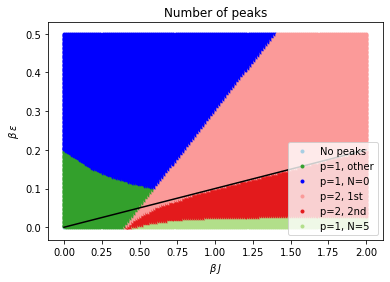

In [13]:
eps_part3 = np.linspace(0, 0.5, 150) 
J_part3 = np.linspace(0, 2, 150)
ep_mesh, J_mesh = np.meshgrid(eps_part3, J_part3)


peak_info_10 = []
for eps, Js in zip(ep_mesh, J_mesh):
    for ep, J in zip(eps,Js):
        peaks = find_peaks(ep,J)
        peak_info_10.append(peaks)
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

n_0, n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8 = 0,0,0,0,0,0,0,0,0

for p in peak_info_10[::]:

    if p[2] == 0:
        if n_0 == 0:
            plt.scatter(p[1], p[0], color=colors[0], marker='.', label='No peaks')
        plt.scatter(p[1], p[0], color=colors[0], marker='.')
        n_0 +=1
    # 1 peak
    ## Empty
    if p[2] == 1 and p[3]==[0]:
        if n_1 == 0:
            plt.scatter(p[1], p[0], color='blue', marker='.', label='p=1, N=0')
        plt.scatter(p[1], p[0], color='blue', marker='.')
        n_1 +=1
    ## Full
    if p[2] == 1 and p[3]==[5]:
        if n_2 == 0:
            plt.scatter(p[1], p[0], color=colors[2], marker='.', label='p=1, N=5')
        plt.scatter(p[1], p[0], color=colors[2], marker='.')
        n_2 +=1
    ## Elsewhere
    if p[2] == 1 and p[3]!=[0] and p[3]!=[5]:
        if n_3 == 0:
            plt.scatter(p[1], p[0], color=colors[3], marker='.', label='p=1, other')
        plt.scatter(p[1], p[0], color=colors[3], marker='.')
        n_3 +=1

    #2 peaks
    ## First larger
    if p[2] == 2 and p[3]==[0]: # 1st larger
        if n_4 == 0:
            plt.scatter(p[1], p[0], color=colors[4], marker='.', label='p=2, 1st')
        plt.scatter(p[1], p[0], color=colors[4], marker='.')
        n_4 +=1
    ## Second larger
    if p[2] == 2 and p[3]==[1]: #and 2nd larger:
        if n_5 == 0:
            plt.scatter(p[1], p[0], color=colors[5], marker='.', label='p=2, 2nd')
        plt.scatter(p[1], p[0], color=colors[5], marker='.')
        n_5 +=1
    
    # 3, 4, and 5 peaks
    if p[2] == 3:
        if n_6 == 0:
            plt.scatter(p[1], p[0], color=colors[6], marker='.', label='p=3')
        plt.scatter(p[1], p[0], color=colors[6], marker='.')
        n_6 +=1
    if p[2] == 4:
        if n_7 == 0:
            plt.scatter(p[1], p[0], color=colors[7], marker='.', label='p=4')
        plt.scatter(p[1], p[0], color=colors[7], marker='.')
        n_7 +=1
    if p[2] == 5:
        if n_8 == 0:
            plt.scatter(p[1], p[0], color=colors[8], marker='.', label='p=5')
        plt.scatter(p[1], p[0], color=colors[8], marker='.')
        n_8 +=1

plt.title('Number of peaks')
plt.xlabel(r'$\beta  \,J$')
plt.ylabel(r'$\beta \, \epsilon$')

J_special = [0,2]
eps_special = [0,0.2]
plt.plot(J_special, eps_special, color='black');

plt.legend();

HE DOES eps vs J, label J/kT or $\beta J$
He also did 

Number the cases,then use colormap for that metric. colormap(c)-make a matrix, make a matrix c and then colormap(c)
P(5)>P(0)
P(N) 

Physical interpretation: 
- P=1, N=0, empty: only at high values of $\epsilon$
- P=1, N=5, full: only at low values of $\epsilon$ 
# (hydrophobicity/not)
- P=1, N=intermediate, intermediately full:lowe values of J, low values of $\epsilon$.

- No peaks only when J, $\epsilon$ is very small.
# No more than 2 peaks? large flucs? need more resolution?
- ask Andy. Hyengjoo did not find any
# MAKE FINER SO HIGHER RESOLUTION.

colorschemes: http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

# Part 4

In this case, we can only have two cases: 0 or 2 interfaces, as an odd number of interfaces in a system with our symmetric boundary conditions is not possible. 

- For 0 interfaces, all $s_i$ = 1, and so the hamiltonian $ H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L$ becomes 

\begin{align}
H \, (\{s_i = 1 \,\, \forall i \}) = 4 \, \epsilon L - J(L-1)
\end{align}


- For a system with up to two grain boundaries, we can assign k and l as the index where the grain boundaries appear. There are 6 possible interfaces, starting from the bulk-first cell (interface 0) until the last interface, cell L-bulk (interface L=5 in our case). For $k>l$, the number of unoccupied cells is $k-l$, and the number of occupied cells is $L-k-l$. The ranges for the indices $l$ and $k$ are $l:0 \sim L-1=4$, and $k:l+1 \sim L=5$. In this case, we can write the hamiltonian as: 

\begin{align}
H &= [L-(k-l)-(k-l)(-1)] 4 \, \epsilon + (L-3)J \\
H &= [L-2(k-l)] 4 \, \epsilon + (L-3)J
\end{align}
   
<br> <br>

A modified partition function under the constraint will be
\begin{align}
Z^* &= \sum^2_{p=o}\sum_{\{s\}_p} e^{-\beta H(\{s\})} = \sum_{\{s\}_0} e^{-\beta H} + \sum_{\{s\}_2} e^{-\beta H} = e^{-\beta [4\epsilon L-J(L+1)]} + \sum_{\{s\}_2} e^{-\beta H}, \\
\end{align}

where $p$ is the number of interfaces and the last term is the following, with $q$ as the number of unoccupied cells:

\begin{align}
\sum_{\{s\}_2} e^{-\beta H} &= \sum_{q=1}^L \sum_{\{ s\}_2} e^{-\beta[4 \epsilon(L-2q) + (L-3)J]} \, \delta(q -(k-l))  \\
 &= \sum_{q=1}^L (L-q+1) e^{-\beta \, [4 \epsilon(L-2q) + J(L-3)]} \\
 &=  e^{-\beta [4 \epsilon L + J(L-3)]} \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta 8 \epsilon q}
\end{align}

If we call the summation S,

\begin{align}
S &= \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta \epsilon q} \\
e^{8 \, \beta \epsilon } S &= \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta \epsilon (q+1)} = \sum_{q=2}^{L+1} (L-(q-1)+1) \, e^{8 \, \beta \epsilon (q+1)} &= \sum_{q=2}^{L+1} (L-q+2) \, e^{8 \, \beta \epsilon (q+1)} \\
S - e^{8 \, \beta \epsilon} S  &= (1-e^{8 \, \beta \epsilon})S = - \sum_{q=2}^Le^{8 \, \beta \epsilon q} + L e^{8 \, \beta \epsilon} - e^{8 \, \beta \epsilon (L+1)} \\
S &= \frac{- \sum_{q=2}^Le^{8 \, \beta \epsilon q} + L e^{8 \, \beta \epsilon} - e^{8 \, \beta \epsilon (L+1)} }{1-e^{8 \, \beta \epsilon} }
\end{align}

If we call this second summation s,

\begin{align}
s &= \sum_{q=2}^Le^{8 \, \beta \epsilon q} = e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon 3} + ... + e^{8 \, \beta \epsilon L} \\
e^{8 \, \beta \epsilon } s &= e^{8 \, \beta \epsilon 3} + ... + e^{8 \, \beta \epsilon (L+1)} \\
(1-e^{8 \, \beta \epsilon }) s &= e^{8 \, \beta \epsilon 2} - e^{8 \, \beta \epsilon (L+1)} \\
s &= \frac{e^{8 \, \beta \epsilon 2} - e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon }} 
\end{align}

Then the initial summation S is
\begin{align}
S &=  \frac{-e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon (L+1)}}{(1-e^{8 \, \beta \epsilon})^2} + \frac{L e^{8 \, \beta \epsilon}}{1-e^{8 \, \beta \epsilon}}  - \frac{e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon}} \\
 S &= \frac{e^{8 \beta \epsilon}(-1 -L + e^{8 \beta \epsilon L}) +L}{e^{-8 \beta \epsilon} -1}
\end{align}

So overall, $Z^*$ in the closed form is:
\begin{align}
Z^* =& e^{-\beta [4\epsilon L-J(L+1)]} +  e^{-\beta [4 \epsilon L + J(L-3)]} \left[ \frac{ L +e^{8 \beta \epsilon}( e^{8 \beta \epsilon L} -1 -L)}{e^{-8 \beta \epsilon} -1} \right]
\end{align}


Then the free energy will be:

\begin{align}
F(N) &= - k_B T \, ln \frac{\sum_{\{s\}} e^{-\beta H(\{s\})} \, \, \delta \left( N-\sum^L_{i=1}m_i(s_i) \right) \, \, \delta \left\{ q-(k-l) \right\} }{ Z^* } \\ \\ \\
F(N) &= -k_B T \, ln \, \frac{\sum_{\{s\}} e^{-\beta H(\{s\})} \, \, \delta \left( N-\sum^L_{i=1}m_i(s_i) \right) \, \, \delta \left\{ q-(k-l) \right\}}{e^{-\beta [4\epsilon L-J(L+1)]} +  e^{-\beta [4 \epsilon L + J(L-3)]} \left[ \frac{ L +e^{8 \beta \epsilon}( e^{8 \beta \epsilon L} -1 -L)}{e^{-8 \beta \epsilon} -1} \right] } \\ \\ 
\beta F(N) &= - ln \, \frac{\sum_{\{s\}} e^{-\beta H(\{s\})} \, \, \delta \left( N-\sum^L_{i=1}m_i(s_i) \right) \, \, \delta \left\{ q-(k-l) \right\}} {  e^{-\beta [4\epsilon L-J(L+1)]} +  e^{-\beta [4 \epsilon L + J(L-3)]} \left[ \frac{ L +e^{8 \beta \epsilon}( e^{8 \beta \epsilon L} -1 -L)}{e^{-8 \beta \epsilon} -1} \right] } 
\end{align}

# OK 2 DELTA FUNCTIONS? NOTATION?

In [14]:
def approx_partition_fn(eps, J, L=5):
    '''Returns partition function for microstates with 0 or 2 interfaces.'''
    
    zero = np.exp(-4*eps*L+J*(L+1))
    two = np.exp(-4*eps*L-J*(L-3))*(L + np.exp(8*eps)*(np.exp(8*eps*L)-1-L))/(np.exp(-8*eps)-1)
    
    return zero + two

def interfaces(L=5, microstates=microstates()):
    '''Calculates number of interfaces for each microstate.'''
    m = m_i(microstates)
    
    ext_0 = m[:, 0]==0
    ext_L = m[:, L-1]==0
    interior = np.sum([m[:,i]!=m[:,i+1] for i in range(L-1)], axis=0)   
    
    return ext_0+interior+ext_L

def approx_probs(eps, J, L=5, microstates=microstates()):
    '''Calculates probabilities for macrostates with 0 or 2 interfaces.
    Returns a list of probabilities for each macrostate.'''
    all_probs = []
    
    exp_energies = np.exp(-energy(eps,J,microstates))
    partition = approx_partition_fn(eps, J, L)    
    div = exp_energies/partition
    
    m = m_i(microstates)
    
    delta2 = interfaces(L, microstates) <= 2
    
    for N in range(L+1):
        delta = np.sum(m, axis=1) == N
        
        prob_N = np.sum(div*delta*delta2)
        all_probs.append(prob_N)
        
    return all_probs

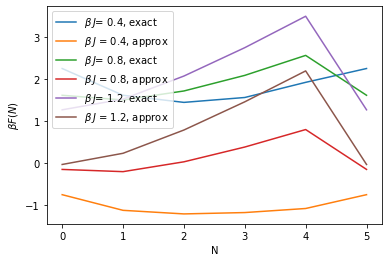

In [15]:
for J in J_part1:
    plt.plot(macrostates, free_energy(J/10, J), label= r'$\beta \, J $= {}, exact'.format(J));
    plt.plot(macrostates, -np.log(approx_probs(J/10, J)), label= r'$\beta  \,J$ = {}, approx'.format(J))
plt.legend();
plt.xlabel('N');
plt.ylabel(r'$\beta F(N)$');

At high temperatures, the method breaks down because entropy starts to take a bigger role
# explain well
mean field good at high epsilon. not good at low epsilons: high fluctuations

# Part 5

### Mean field treatment

For the uncoupled case, the hamiltonian for the i$\mathrm{^{th}}$ cell in mean field is 
\begin{align}
\beta \, h_{i,mf} = -4\beta \, \epsilon + \beta \, J(<s_{i-1}>_{mf} + <s_{i+1}>_{mf})
\end{align}

So for each spin, $<s_{i}>_{mf}$ is:
\begin{align}
<s_{1}>_{mf} &= \mathrm{tanh}\,\left[-4\beta \, \epsilon+\beta \, J (1+<s_{2}>_{mf})\right] \\
<s_{2}>_{mf} &= \mathrm{tanh}\,\left[-4\beta \, \epsilon+\beta \, J (<s_{1}>_{mf}+<s_{3}>_{mf})\right] \\
... \\
<s_{L=5}>_{mf} &= \mathrm{tanh}\,\left[-4\beta \, \epsilon+\beta \, J (<s_{4}>_{mf}+1)\right]
\end{align}

# fulfill?

We need to fulfill? all of the equations at once. So we can use an iterative approach to solve them. 


Start filled and empty
reproduce plots P(N)
Compare with each other, exact part 2


importance fluc's water occupancy?

based Newton's method 

In [16]:
def spin_solve(s, *args):
    eps, J = args
    s1, s2, s3, s4, s5 = s
    
    x1 = np.tanh(-4*eps + J*(1+s2)) - s1
    x2 = np.tanh(-4*eps+J*(s1+s3)) - s2
    x3 = np.tanh(-4*eps+J*(s2+s4)) - s3
    x4 = np.tanh(-4*eps+J*(s3+s5)) - s4
    x5 = np.tanh(-4*eps+J*(s4+1)) - s5
    
    x = np.array([x1, x2, x3, x4, x5])
    
    return x

In [17]:
J = 1.198
eps = J/10

x, a, b, c = scipy.optimize.fsolve(spin_solve, np.array([1,1,1,1,1]), (eps, J), full_output=True)

In [18]:
a

{'nfev': 12, 'fjac': array([[-9.94113371e-01,  1.07846838e-01,  5.02825852e-03,
          8.99692493e-03,  1.19910202e-03],
        [-1.06263084e-01, -9.85733220e-01,  1.30333502e-01,
          7.51623157e-04,  7.12666694e-03],
        [-1.77083402e-02, -1.28008827e-01, -9.83428859e-01,
          1.27137899e-01,  1.94639110e-03],
        [-1.10863982e-02, -1.53092570e-02, -1.25066801e-01,
         -9.86026597e-01,  1.08409239e-01],
        [-3.20465773e-03, -8.85694239e-03, -1.46242634e-02,
         -1.07265999e-01, -9.94078177e-01]]), 'r': array([ 1.00470960e+00, -2.12838074e-01,  9.44316854e-03, -1.51382482e-02,
        -4.20193175e-04,  9.92373052e-01, -2.53245042e-01,  1.71495642e-02,
        -1.54165578e-02,  9.82790788e-01, -2.53194708e-01,  5.68528249e-03,
         9.82585104e-01, -2.15902874e-01,  9.81099978e-01]), 'qtf': array([-2.47903439e-12,  7.24139103e-12, -7.39435508e-12,  5.78053513e-12,
        -1.11103954e-12]), 'fvec': array([ 0.00000000e+00, -1.11022302e-16,  1.1102

In [19]:
e, f, g, h = scipy.optimize.fsolve(spin_solve, np.array([-1,-1,-1,-1,-1]), (eps, J), full_output=True)

In [20]:
f

{'nfev': 12, 'fjac': array([[-9.99495529e-01,  2.84417937e-02,  7.50744139e-04,
          1.32255635e-02,  4.92677534e-03],
        [-2.80904958e-02, -9.99143450e-01,  1.80007969e-02,
          1.90362103e-02,  1.53910604e-02],
        [-1.03486429e-03, -1.76617494e-02, -9.99710709e-01,
          1.62809651e-02,  6.47811846e-04],
        [-6.11464374e-03, -2.89953574e-03, -1.11414311e-02,
         -7.15453196e-01,  6.98539044e-01],
        [-1.34592764e-02, -2.41471811e-02, -1.13918404e-02,
         -6.98086213e-01, -7.15389143e-01]]), 'r': array([ 9.95597167e-01, -9.97767430e-01, -2.31892511e-04, -1.81822117e-02,
        -9.05565190e-03,  9.67233760e-01, -3.33290707e-02, -9.19825641e-03,
        -2.80569125e-02,  9.99668232e-01, -3.23271384e-02, -1.16846995e-03,
         1.38910790e+00, -7.15448331e-01,  6.91720206e-01]), 'qtf': array([ 3.10952440e-10, -7.32811985e-10,  4.19201670e-11, -7.33413395e-10,
        -3.36597951e-10]), 'fvec': array([-1.63813407e-13,  4.35651515e-13, -2.4980

# Part 6

To model the dynamics of the system obeying detailed balance, I will use the Monte Carlo-Metropolis Algorithm, as explained in class. 
# write eqs? seen in class

# ok interval  [0,1)?

Functions to run the dynamics: acceptance criteria and actual dynamics.

In [21]:
def acceptance(eps,J,spins, L=5):
    '''Generates a new microstate and determines whether it should 
    be accepted or not. Spins is a list of spins.'''
        
    spins_test = np.copy(spins)
    to_change = int(np.random.randint(low=0,high=L,size=1))
    spins_test[:,to_change] = spins[:,to_change]*-1

    energy_start = energy(eps, J, spins)
    energy_test = energy(eps, J, spins_test)
    
    # Accept
    if energy_test <= energy_start:
        return spins_test  
    
    if np.random.random() <= np.exp(-energy_test):
        return spins_test
    
    # Reject
    return spins

#########################################################################

def dynamics(eps, J, init_spins, steps, L=5):
    '''Runs dynamics of the system.'''
    
    spins_dyn = np.zeros((steps, L))
    spins = init_spins
    
    for step in range(steps):
        spins = acceptance(eps, J, spins)
        spins_dyn[step] = spins
        
    return spins_dyn

Functions for the analysis of the dynamics of a system.

In [22]:
def avg_prob(dyns, eps, J, L=5):
    '''Calculates running average given the dynamics of a system. 
    Dyns is a list of microstates.'''
    avg_prob = np.zeros((len(dyns), L+1))
    
    for i, _ in enumerate(dyns):
        avg_prob[i] = all_probs(eps, J, L, dyns[:i+1])
        
    return avg_prob

#########################################################################

def info_dyn(dyns, eps, J, L=5):
    '''Calculates running average, occupation number 
    and number of interfaces given the dynamics of a system. Dyns 
    is a list of microstates.'''
    clean_info = m_i(dyns)
        
    # Occupation number
    occup = np.zeros(len(dyns))
    for i, c in enumerate(clean_info):
        occup[i] = np.sum(c)
        
    # Number of interfaces
    interf = np.zeros(len(dyns))
    for i, c in enumerate(clean_info):
        ext_0 = c[0]==0
        ext_L = c[L-1]==0
        
        interior = 0
        for m in range(len(c)-1):
            interior += c[m]!=c[m+1]
            
        interf[i] = ext_0+interior+ext_L
    
    return occup, interf

# OK BISTABILITY?

Calculating for the three different cases.

In [23]:
starJ_rt = 1.198
init_spins = np.array([[-1,-1,-1,-1,-1]])

#Running dynamics for 10,000 steps
eps_bist = J_rt/10
dyn_bist = dynamics(eps_bist, J_rt, init_spins, 10000)
prob_bist = avg_prob(dyn_bist, eps_bist, J_rt) # 23 s 10,000
info_bist = info_dyn(dyn_bist, eps_bist, J_rt)


#eps_filled = np.linspace(0.01,0.05, 5)
eps_filled = 0.03
dyn_filled = dynamics(eps_filled, J_rt, init_spins, 10000)
prob_filled = avg_prob(dyn_filled, eps_filled, J_rt) # 23 s 10,000
info_filled = info_dyn(dyn_filled, eps_filled, J_rt)


#eps_empty = np.linspace(0.4,0.5, 5)
eps_empty = 0.45
dyn_empty = dynamics(eps_empty, J_rt, init_spins, 10000)
prob_empty = avg_prob(dyn_empty, eps_empty, J_rt) # 23 s 10,000
info_empty = info_dyn(dyn_empty, eps_empty, J_rt)

Analysis of the results.

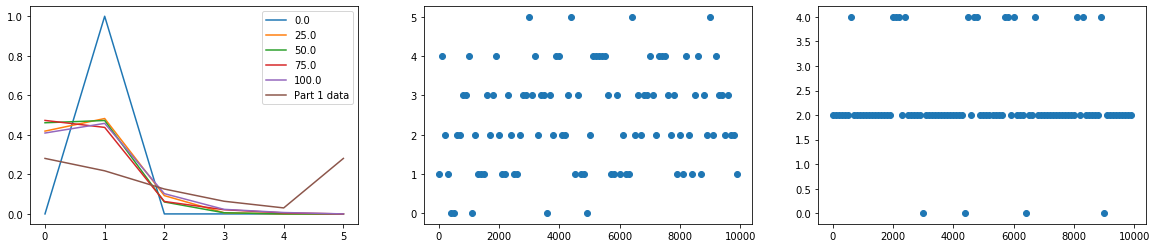

In [24]:
# TIME-AVERAGE PROBABILITY
a = 'Bistable'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
#fig.suptitle('{}'.format(a))
#ax1.plot(x, y)
#ax2.plot(x, -y)



#plt.subplots()
times = np.linspace(0,len(prob_bist)/100, 5)

for t in times:
    ax1.plot(macrostates, prob_bist[int(t)], label='{}'.format(t));

ax1.plot(macrostates, all_probs(J_rt/10, J_rt), label='Part 1 data');

#ax1.xlabel('N');
#ax1.ylabel('P(N)');
#ax1.title('P(N) in different times along dynamics')
ax1.legend();
#plt.show()


# OCCUPATION NUMBER
#.subplot()
ax2.scatter(range(len(info_bist[0]))[::100], info_bist[0][::100]);

#ax2.xlabel('t');
#ax2.ylabel('N');
#ax2.title('Occupation number vs time');
#plt.show()


# NUMBER OF INTERFACES
#plt.subplot()
ax3.scatter(range(len(info_bist[1]))[::100], info_bist[1][::100]);

#ax3.xlabel('t');
#ax3.ylabel('Number of interfaces');
#ax3.title('Number of interfaces vs time');
#fig.title('bistable')

# label and clean up

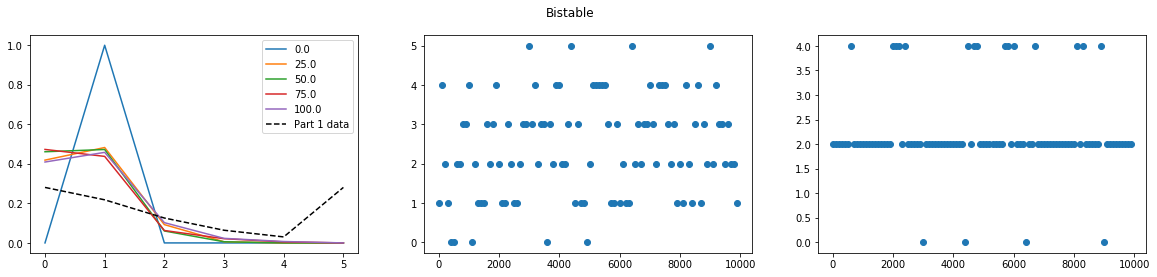

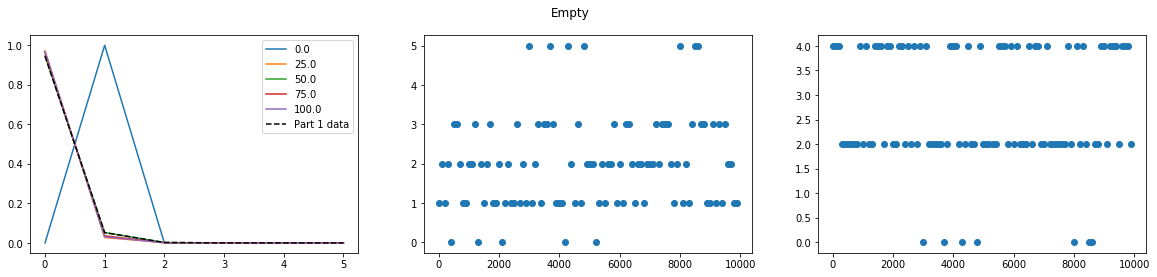

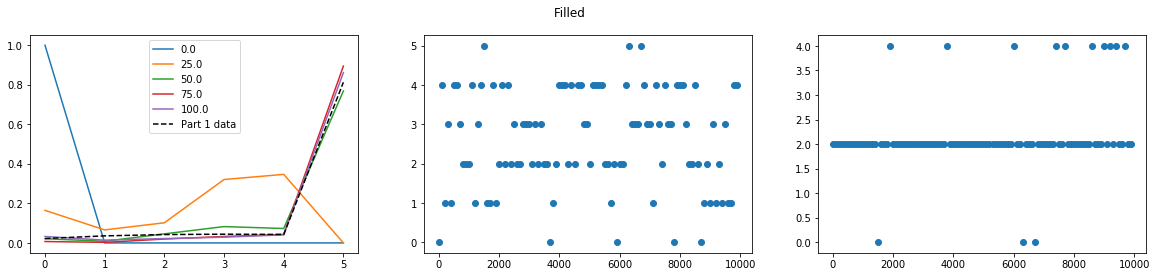

In [25]:
# TIME-AVERAGE PROBABILITY
a = 'Bistable'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
times = np.linspace(0,len(prob_bist)/100, 5)

for t in times:
    ax1.plot(macrostates, prob_bist[int(t)], label='{}'.format(t));

ax1.plot(macrostates, all_probs(eps_bist, J_rt), color='black',  linestyle= '--', label='Part 1 data');

ax1.legend();
# OCCUPATION NUMBER
ax2.scatter(range(len(info_bist[0]))[::100], info_bist[0][::100]);
# NUMBER OF INTERFACES
ax3.scatter(range(len(info_bist[1]))[::100], info_bist[1][::100]);
fig.suptitle('Bistable');

# TIME-AVERAGE PROBABILITY
b = 'Empty'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
times = np.linspace(0,len(prob_empty)/100, 5)

for t in times:
    ax1.plot(macrostates, prob_empty[int(t)], label='{}'.format(t));

ax1.plot(macrostates, all_probs(eps_empty, J_rt), color='black',  linestyle= '--', label='Part 1 data');

ax1.legend();
# OCCUPATION NUMBER
ax2.scatter(range(len(info_empty[0]))[::100], info_empty[0][::100]);
# NUMBER OF INTERFACES
ax3.scatter(range(len(info_empty[1]))[::100], info_empty[1][::100]);
fig.suptitle('Empty');

c = 'Filled'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
times = np.linspace(0,len(prob_filled)/100, 5)

for t in times:
    ax1.plot(macrostates, prob_filled[int(t)], label='{}'.format(t));

ax1.plot(macrostates, all_probs(eps_filled, J_rt), color='black',  linestyle='--', label='Part 1 data');

ax1.legend();
# OCCUPATION NUMBER
ax2.scatter(range(len(info_filled[0]))[::100], info_filled[0][::100]);
# NUMBER OF INTERFACES
ax3.scatter(range(len(info_filled[1]))[::100], info_filled[1][::100]);
fig.suptitle('Filled');

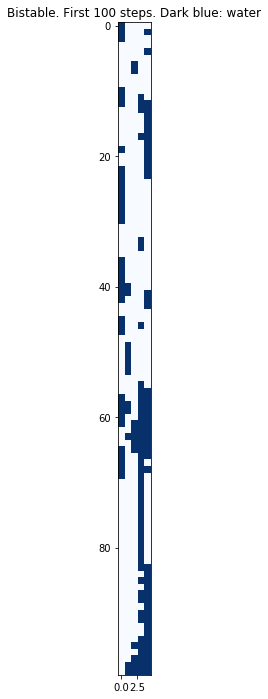

In [26]:
m = dyn_bist == 1
plt.rcParams["figure.figsize"] = (20,12)
plt.imshow(m[:100], cmap='Blues');
plt.title('Bistable. First 100 steps. Dark blue: water');
#ax = plt.gca();
#ax.set(xlim=(0, 4), ylim=(0, 100));

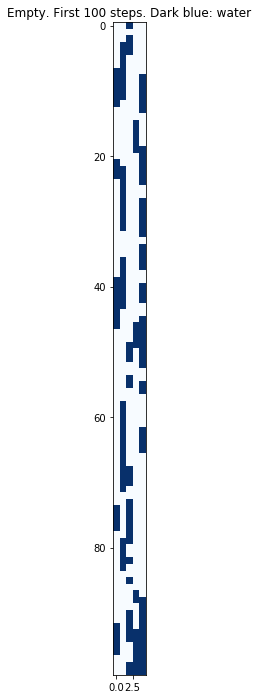

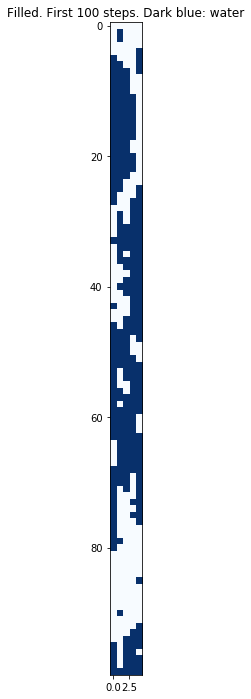

In [27]:
plt.rcParams["figure.figsize"] = (20,12)
plt.imshow(m_i(dyn_empty)[:100], cmap='Blues');
plt.title('Empty. First 100 steps. Dark blue: water');

plt.show()

plt.rcParams["figure.figsize"] = (20,12)
plt.imshow(m_i(dyn_filled)[:100], cmap='Blues');
plt.title('Filled. First 100 steps. Dark blue: water');


Last 100 (hard to read axis): also empties through the outside: 
# OJO IF GENERATE AGAIN LAST STEPS MIGHT NOT BE THE SAME

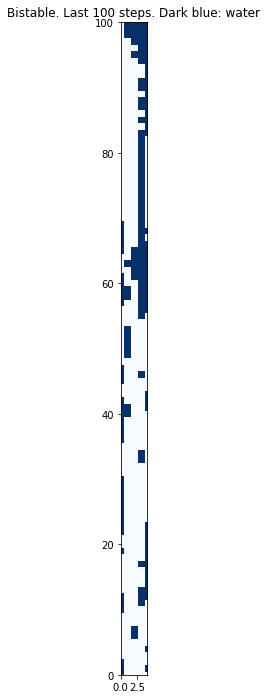

In [28]:
plt.rcParams["figure.figsize"] = (20,12)
plt.imshow(m[:-100], cmap='Blues');
ax = plt.gca();
ax.set(xlim=(0, 4), ylim=(0, 100));
plt.title('Bistable. Last 100 steps. Dark blue: water');

The mechanism is of filling first through the sides and then filling in the middle cells.